# DECISION TREE

## Objective:

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


## Tasks:

### 1. Data Preparation:

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [97]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [98]:
df = pd.read_excel('./heart_disease.xlsx', sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


### 2. Exploratory Data Analysis (EDA):
* Perform exploratory data analysis to understand the structure of the dataset.
* Check for missing values, outliers, and inconsistencies in the data.
* Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [99]:
# Checking for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [100]:
# Checking for duplicated rows
df.duplicated().sum()

1

In [101]:
# Checking for feature data types
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [102]:
# Checking for Inconsistencies
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [103]:
# Replacing with proper boolean values
df['exang'].replace({'FALSE': False, 'TURE': True}, inplace=True)

In [104]:
# Checking for dtypes again
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang          bool
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [105]:
# Statistical Summary
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

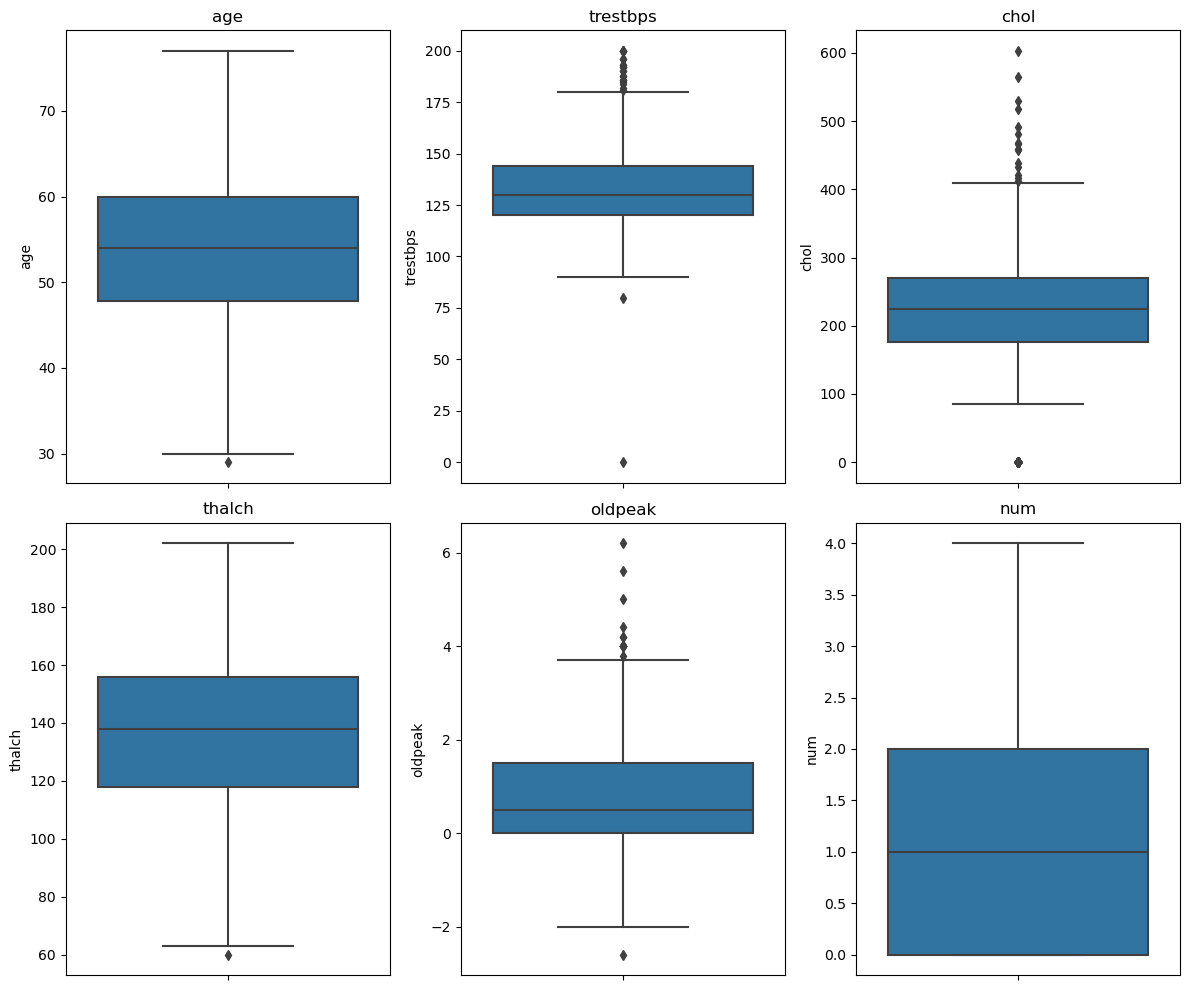

In [107]:
# Checking for Outliers using Boxplots
plt.figure(figsize=(12, 10))
for i, col in enumerate(df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

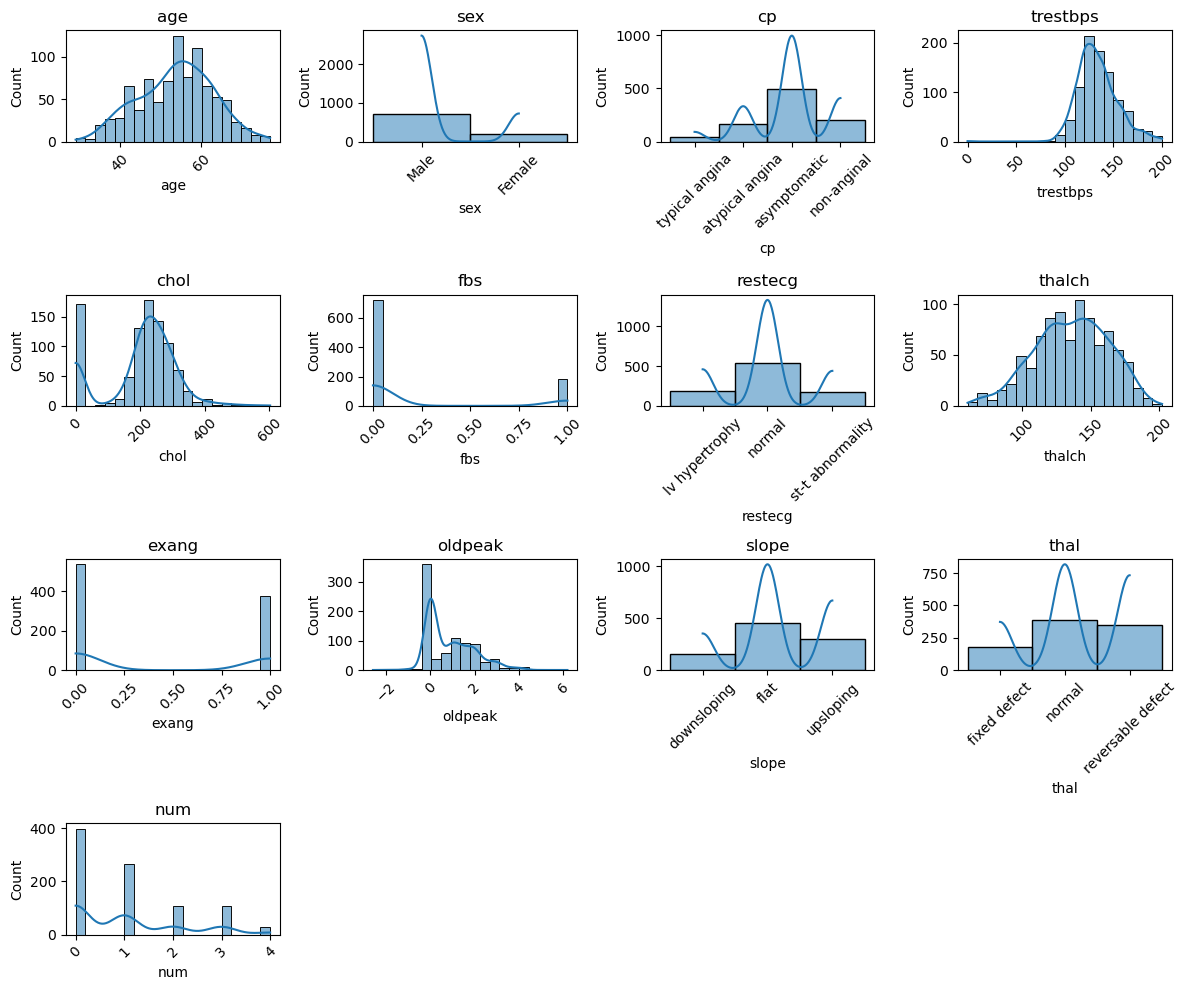

In [108]:
# Checking for Distribution of Features

plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.xticks(rotation = 45)
    plt.title(col)
plt.tight_layout()
plt.show()

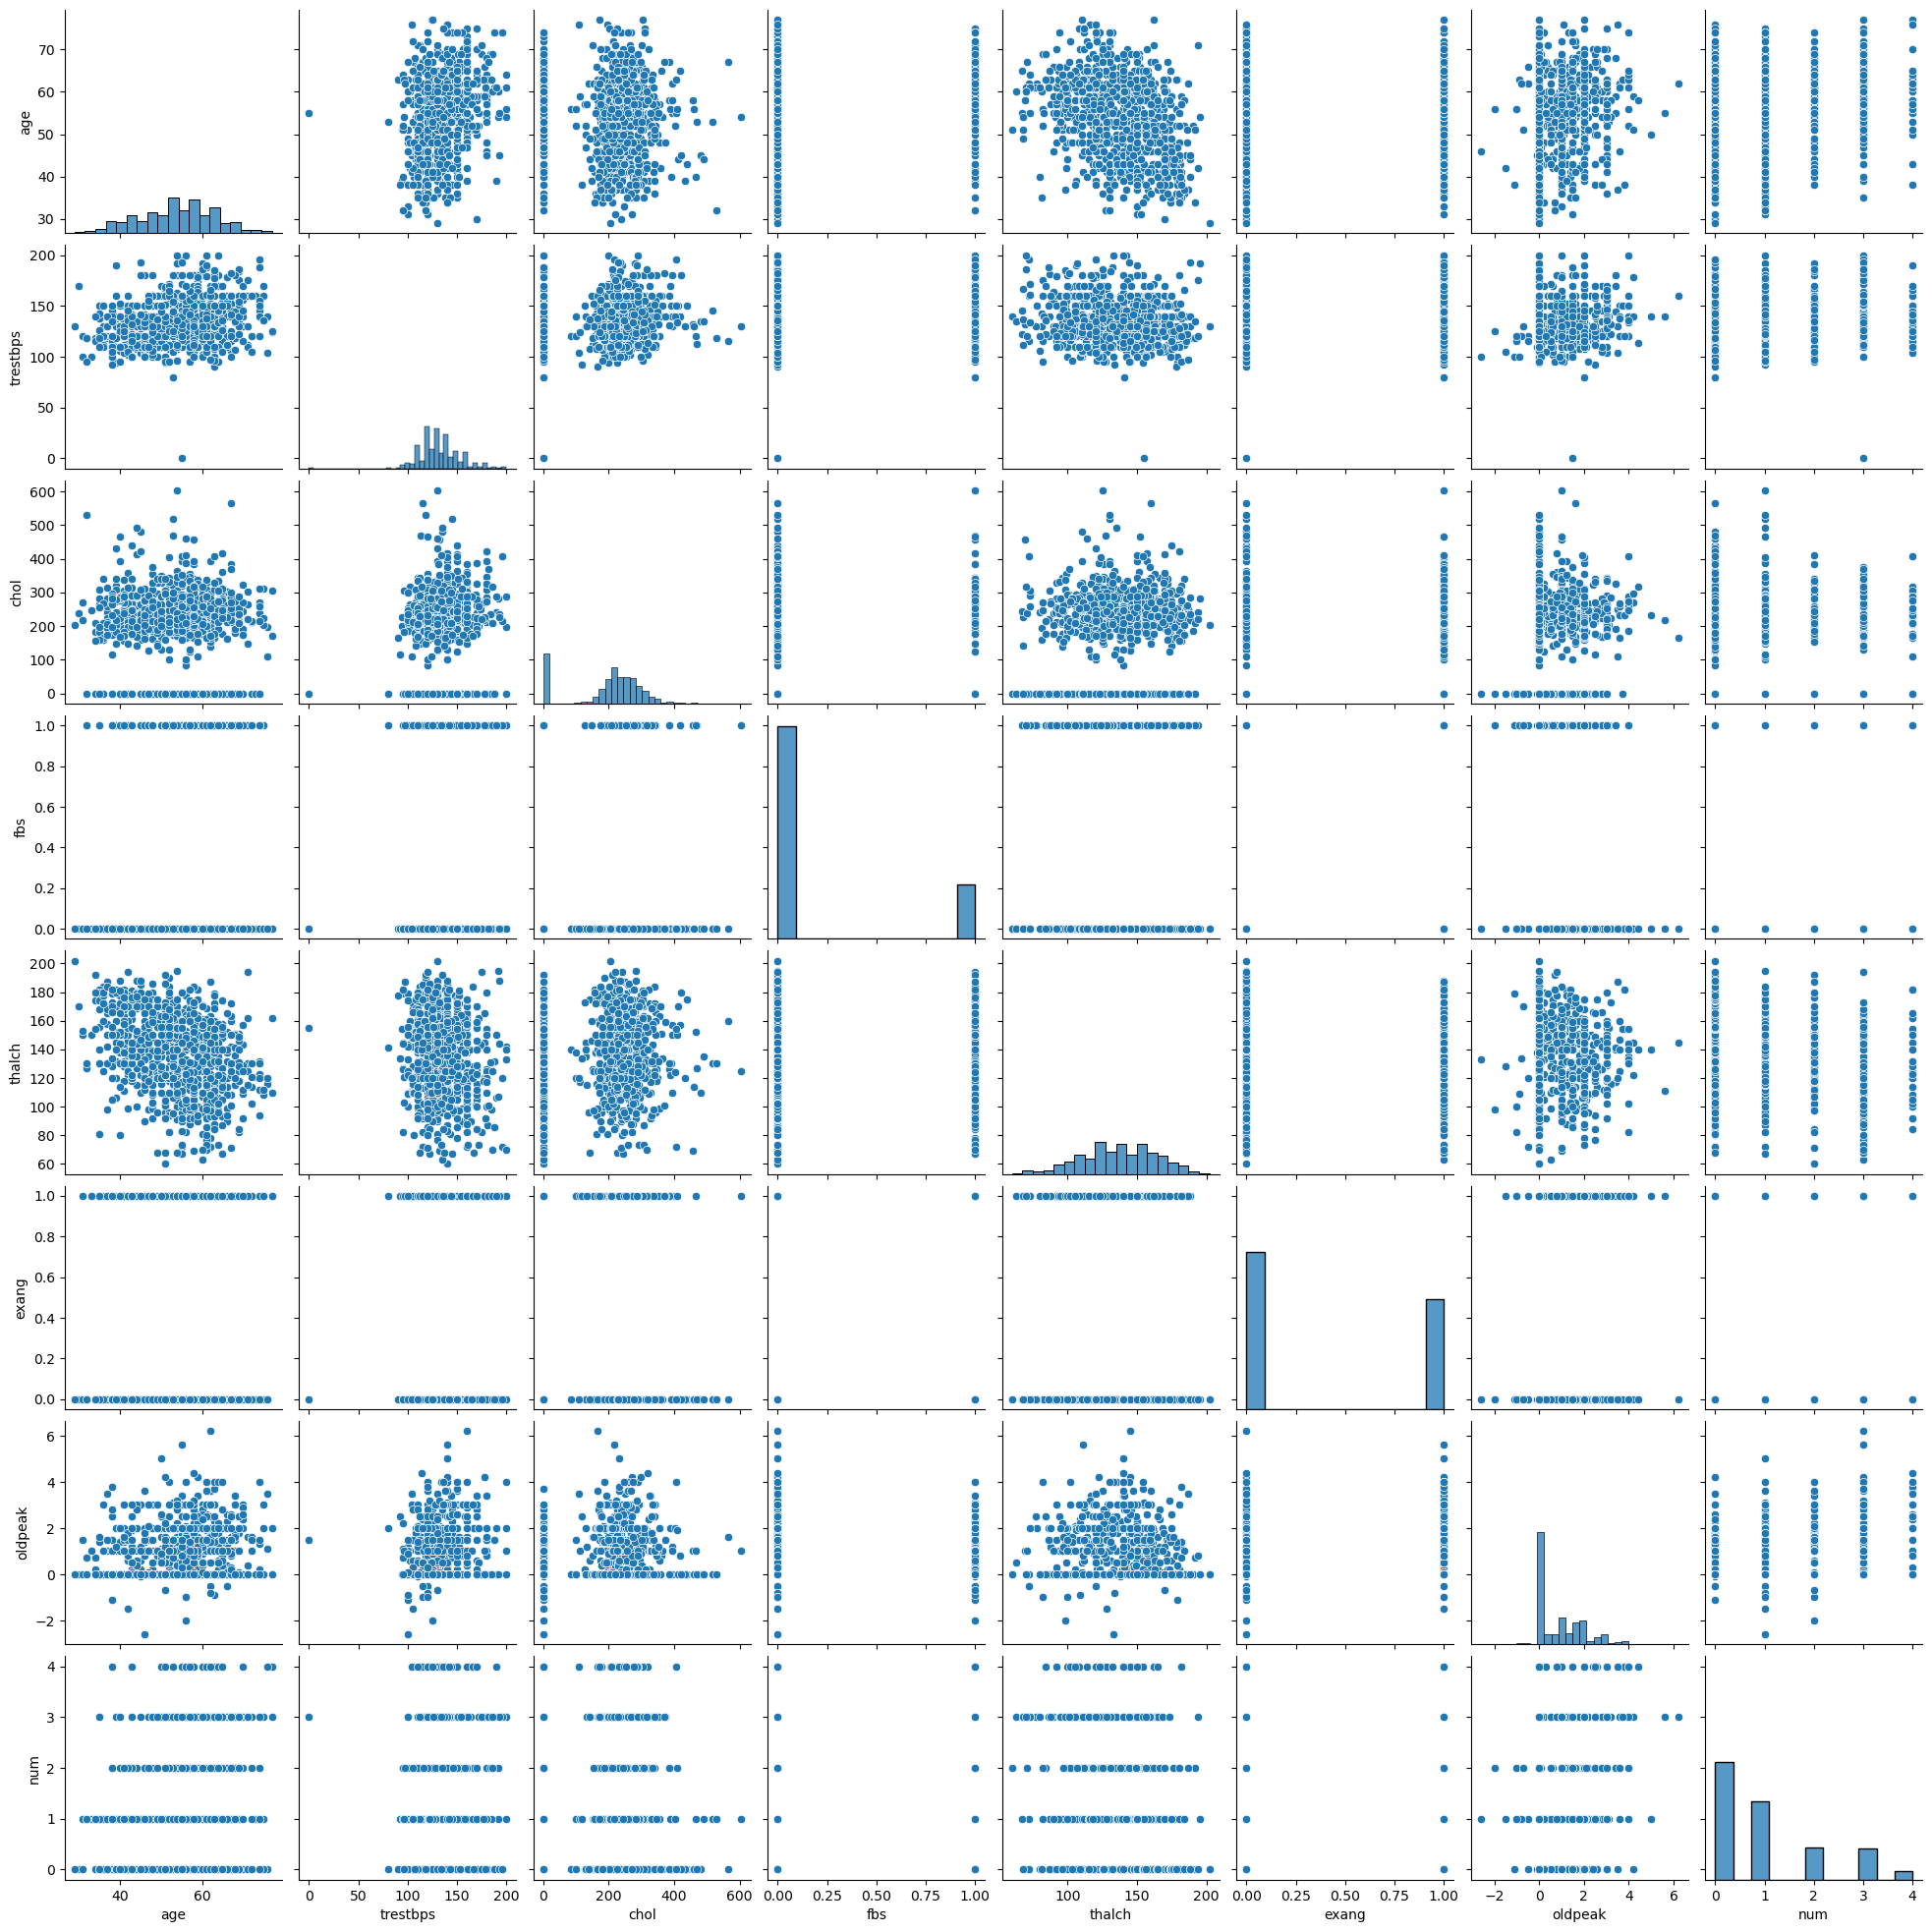

In [109]:
# Checking for Correlation using scatter plots
sns.pairplot(df)

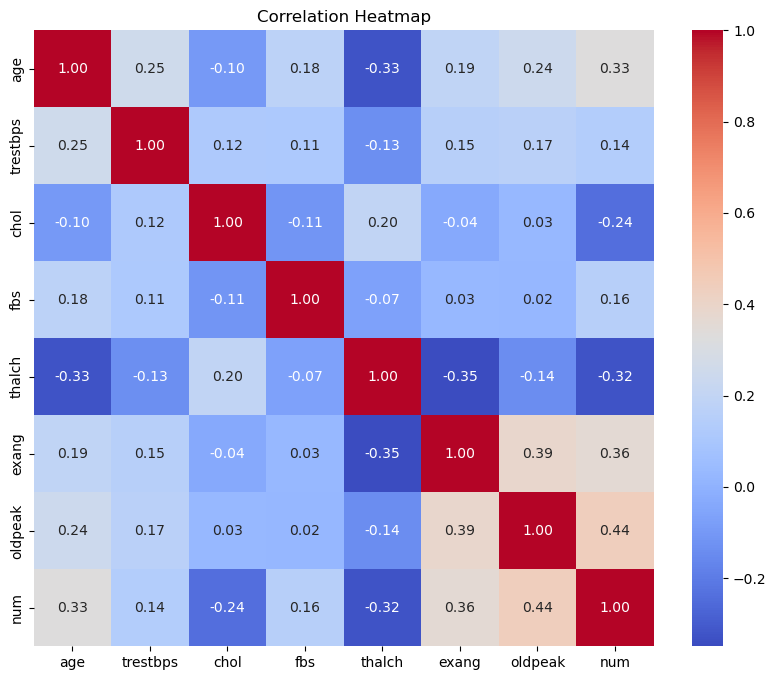

In [110]:
# Checking for Correlations using Heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 3. Feature Engineering:

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [111]:
# Handling Missing Values
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

In [112]:
# Checking for Missing Values Again
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [113]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [114]:
# Encoding Categorical Variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'thal'], drop_first=True)
df.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,False,2.3,0,1,0,0,1,0,0,0,0,0,0
1,41,135,203,False,132,False,0.0,0,1,1,0,0,1,0,1,0,0,0
2,57,140,192,False,148,False,0.4,0,1,0,0,0,1,0,1,0,0,0
3,52,118,186,False,190,False,0.0,0,1,0,0,1,0,0,1,0,0,0
4,57,110,201,False,126,True,1.5,0,1,0,0,0,1,0,1,0,0,0


### 4. Decision Tree Classification:
* Split the dataset into training and testing sets (e.g., using an 80-20 split).
* Implement a Decision Tree Classification model using a library like scikit-learn.
* Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [115]:
# Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split

# Splitting into features and target variable
X = df.drop('num', axis=1)
y = df['num']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [116]:
# Training Model using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Making Predicions
y_pred = model.predict(X_test)

In [117]:
# Evaluating Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')
print(f'ROC_AUC: {roc_auc}')

Accuracy: 0.4236588720770289
Precision: 0.27457367646254915
Recall: 0.2786508463196028
F1: 0.2752058913229866
ROC_AUC: 0.5567023634689218


### 5. Hyperparameter Tuning:

* Perform hyperparameter tuning to optimize the Decision Tree model. 

* Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [118]:
# Optimising Model
from sklearn.model_selection import GridSearchCV

# Defining hyperparameters for tuning
param_grid = {
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initializing GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
print(f'Optimal Parameters: {best_params}')

Optimal Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}


### 6. Model Evaluation and Analysis:

* Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

* Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [119]:
# Re-Training with the best parameters
best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Making Predictions
best_y_pred = best_model.predict(X_test)

In [120]:
# Evaluating Best Model
best_accuracy = accuracy_score(y_test, best_y_pred)
best_precision = precision_score(y_test, best_y_pred, average='macro')
best_recall = recall_score(y_test, best_y_pred, average='macro')
best_f1 = f1_score(y_test, best_y_pred, average='macro')
best_roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy: {best_accuracy}')
print(f'Precision: {best_precision}')
print(f'Recall: {best_recall}')
print(f'F1: {best_f1}')
print(f'ROC_AUC: {best_roc_auc}')

Accuracy: 0.4965612104539202
Precision: 0.3134151341183187
Recall: 0.30691505184097934
F1: 0.30282346566429463
ROC_AUC: 0.5951321560419629


In [121]:
# Comparing both the Scores
results = pd.DataFrame({
    'Model': ['with Base Parameters', 'with Optimal Paramters'],
    'Accuracy': [accuracy, best_accuracy],
    'Precision': [precision, best_precision],
    'Recall': [recall, best_recall],
    'F1 Score': [f1, best_f1],
    'ROC_AUC Score': [roc_auc, best_roc_auc]
})

display(results)

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC Score
0,with Base Parameters,0.423659,0.274574,0.278651,0.275206,0.556702
1,with Optimal Paramters,0.496561,0.313415,0.306915,0.302823,0.595132


In [122]:
# Plotting Roc Curves
from sklearn.metrics import roc_curve, auc


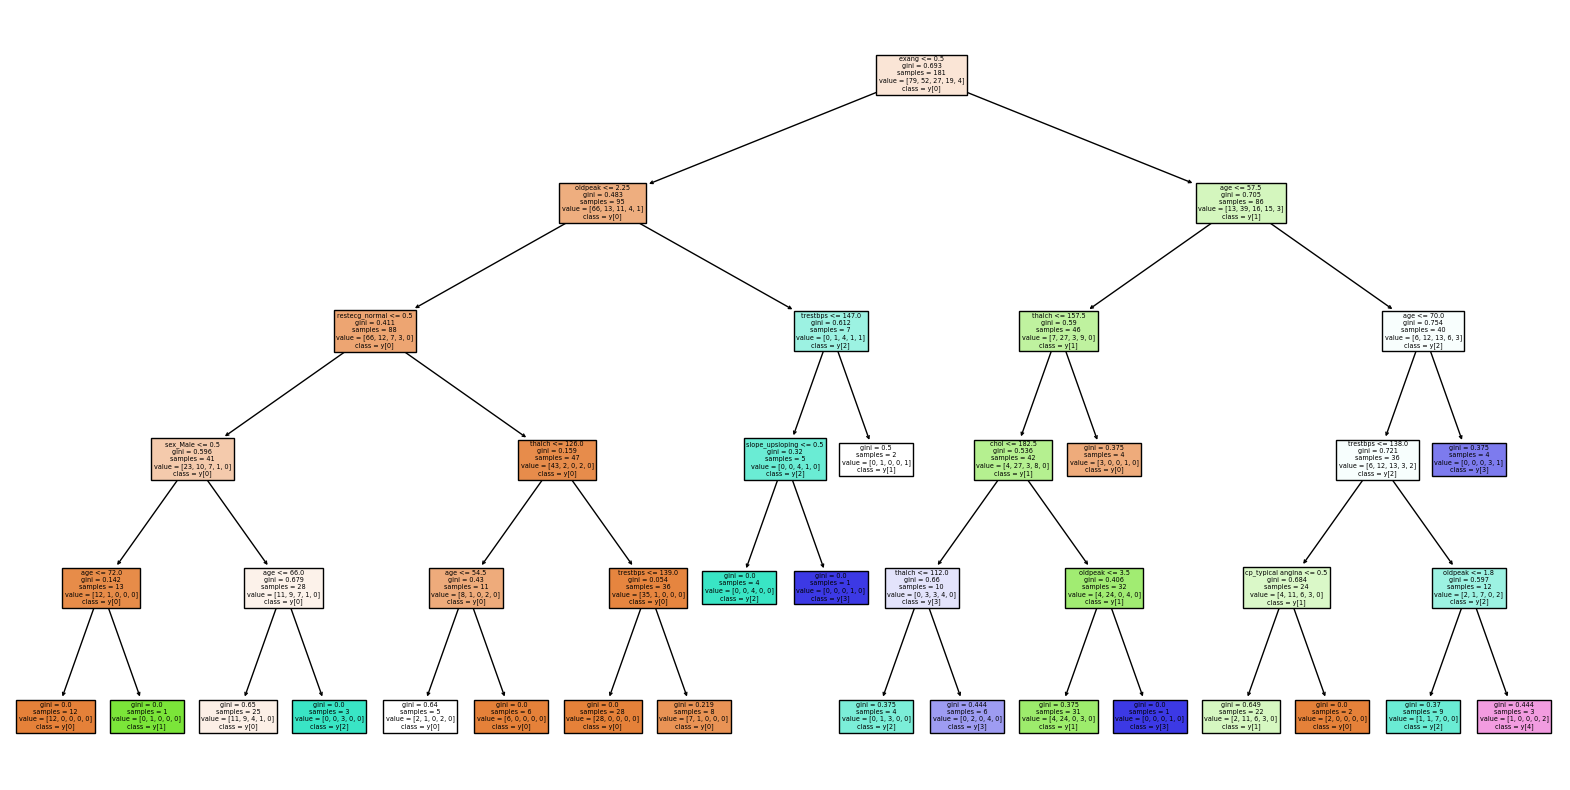

In [123]:
# Visualizing Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    filled=True,
    feature_names=X.columns,
    class_names=True
)

plt.show()

In [124]:
# Important Feature Analysis

importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Getting Feature Ranks
print(f'Feature Ranking: \n')
for f in range(X.shape[1]):
    print(f'{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X.columns[indices[f]]}')

Feature Ranking: 

1. feature 5 (0.2883232725768393) - exang
2. feature 0 (0.1862353445799379) - age
3. feature 6 (0.14204597710511604) - oldpeak
4. feature 4 (0.09697285152039706) - thalch
5. feature 11 (0.06522448144573383) - restecg_normal
6. feature 1 (0.06469230976640236) - trestbps
7. feature 7 (0.05480224151907916) - sex_Male
8. feature 2 (0.04459701893327586) - chol
9. feature 10 (0.032701619228168353) - cp_typical angina
10. feature 14 (0.02440488332504999) - slope_upsloping
11. feature 3 (0.0) - fbs
12. feature 16 (0.0) - thal_reversable defect
13. feature 15 (0.0) - thal_normal
14. feature 9 (0.0) - cp_non-anginal
15. feature 12 (0.0) - restecg_st-t abnormality
16. feature 13 (0.0) - slope_flat
17. feature 8 (0.0) - cp_atypical angina


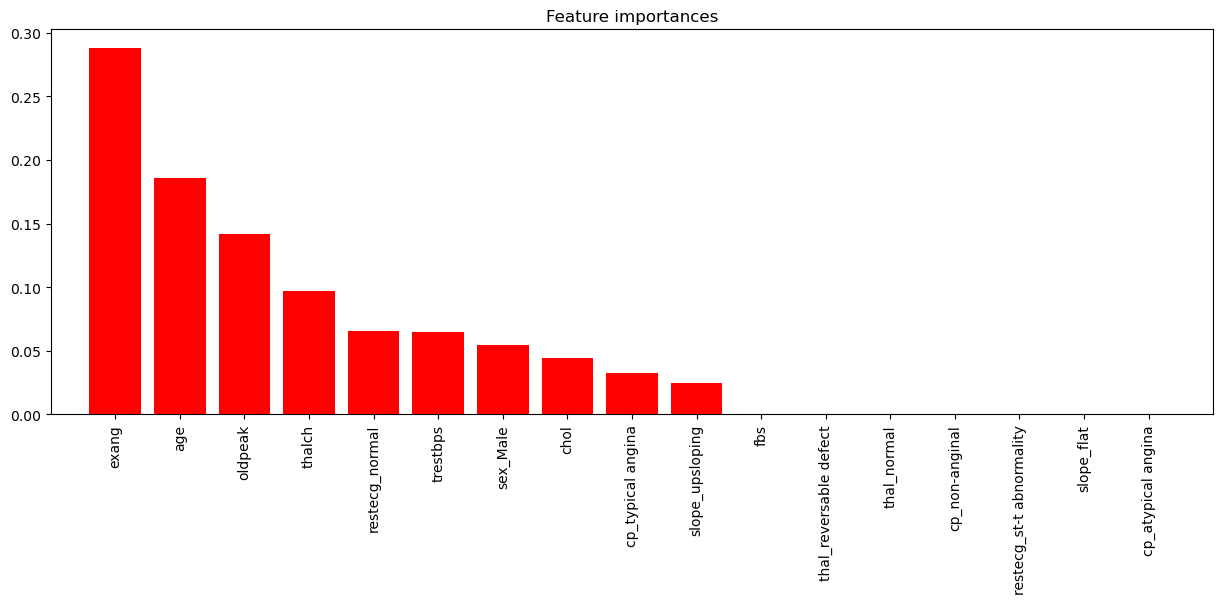

In [125]:
# Plotting feature importances
plt.figure(figsize=(15, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()